# Heart Attack Prediction

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# 1. Importing Packages

In [49]:
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_predict,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,roc_curve,accuracy_score,auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier



# 2. Import Datasets

In [11]:
full_dataset = pd.read_csv('heart.csv', engine = 'python')

## 2.1 Saving a unfilitered test dataset

In [12]:
train_dataset, test_dataset = train_test_split(full_dataset, test_size = 0.1, random_state = 0)

# 3. Initial Data Exploratory

In [13]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 255 to 172
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       272 non-null    int64  
 1   sex       272 non-null    int64  
 2   cp        272 non-null    int64  
 3   trtbps    272 non-null    int64  
 4   chol      272 non-null    int64  
 5   fbs       272 non-null    int64  
 6   restecg   272 non-null    int64  
 7   thalachh  272 non-null    int64  
 8   exng      272 non-null    int64  
 9   oldpeak   272 non-null    float64
 10  slp       272 non-null    int64  
 11  caa       272 non-null    int64  
 12  thall     272 non-null    int64  
 13  output    272 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.9 KB


In [14]:
train_dataset.describe(include = 'all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,54.463235,0.665441,0.974265,131.713235,247.349265,0.143382,0.522059,150.069853,0.334559,1.025000,1.415441,0.720588,2.275735,0.555147
std,9.124322,0.472706,1.032355,17.236325,52.882374,0.351108,0.529107,22.761208,0.472706,1.173021,0.613667,1.025082,0.614462,0.497866
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.750000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,153.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
unique_counts = train_dataset.apply(lambda x : len(x.unique()), axis = 0)


In [16]:
unique_counts

age          41
sex           2
cp            4
trtbps       48
chol        147
fbs           2
restecg       3
thalachh     87
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [17]:
low_cardinality_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
high_cardinality_features = ['trtbps','chol','thalachh','oldpeak']

## 3.1 Duplicates

In [18]:
train_dataset.duplicated().sum()

1

In [19]:
train_dataset[train_dataset.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## 3.2 Missing

In [20]:
train_dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No missing values

In [21]:
len(train_dataset)

272

## 3.1 Target Analysis

<AxesSubplot: >

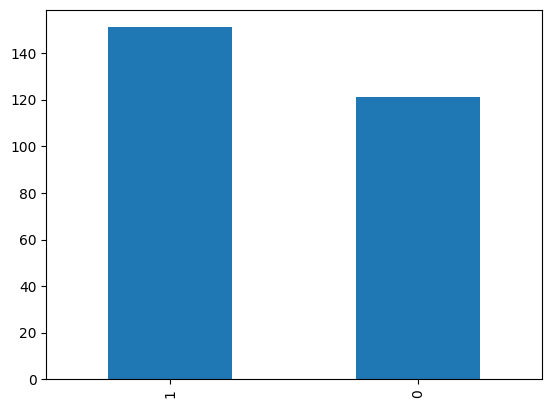

In [22]:
# Plotting the target
train_dataset.output.value_counts().plot(kind = 'bar')

# 4. Exploratory Data Analysis

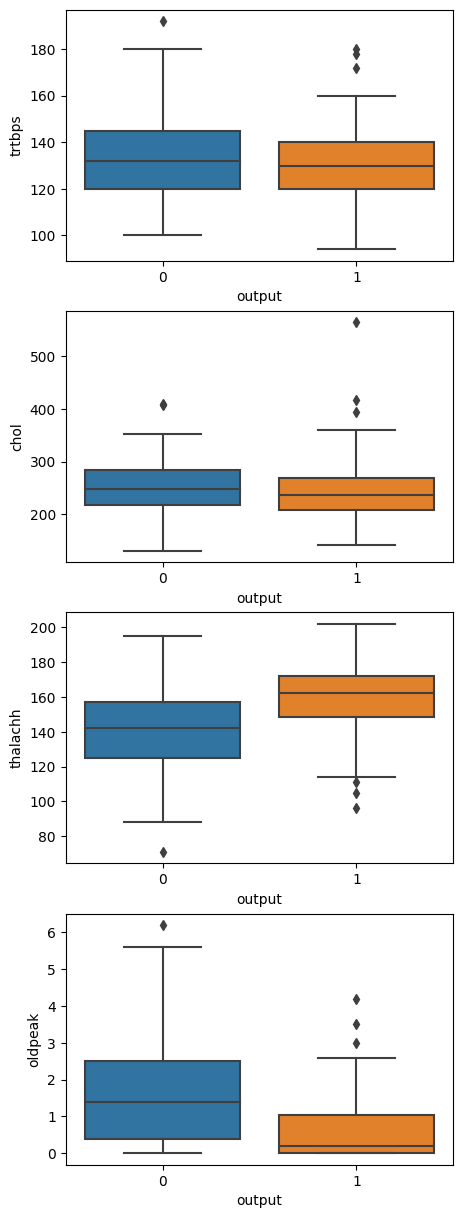

In [23]:
plot_count = len(high_cardinality_features)
fig,ax = plt.subplots(plot_count,1, figsize = (5,15))
count = 0
for plot in high_cardinality_features:
    sns.boxplot(data = train_dataset, x = 'output', y = plot, ax = ax[count])
    count+=1

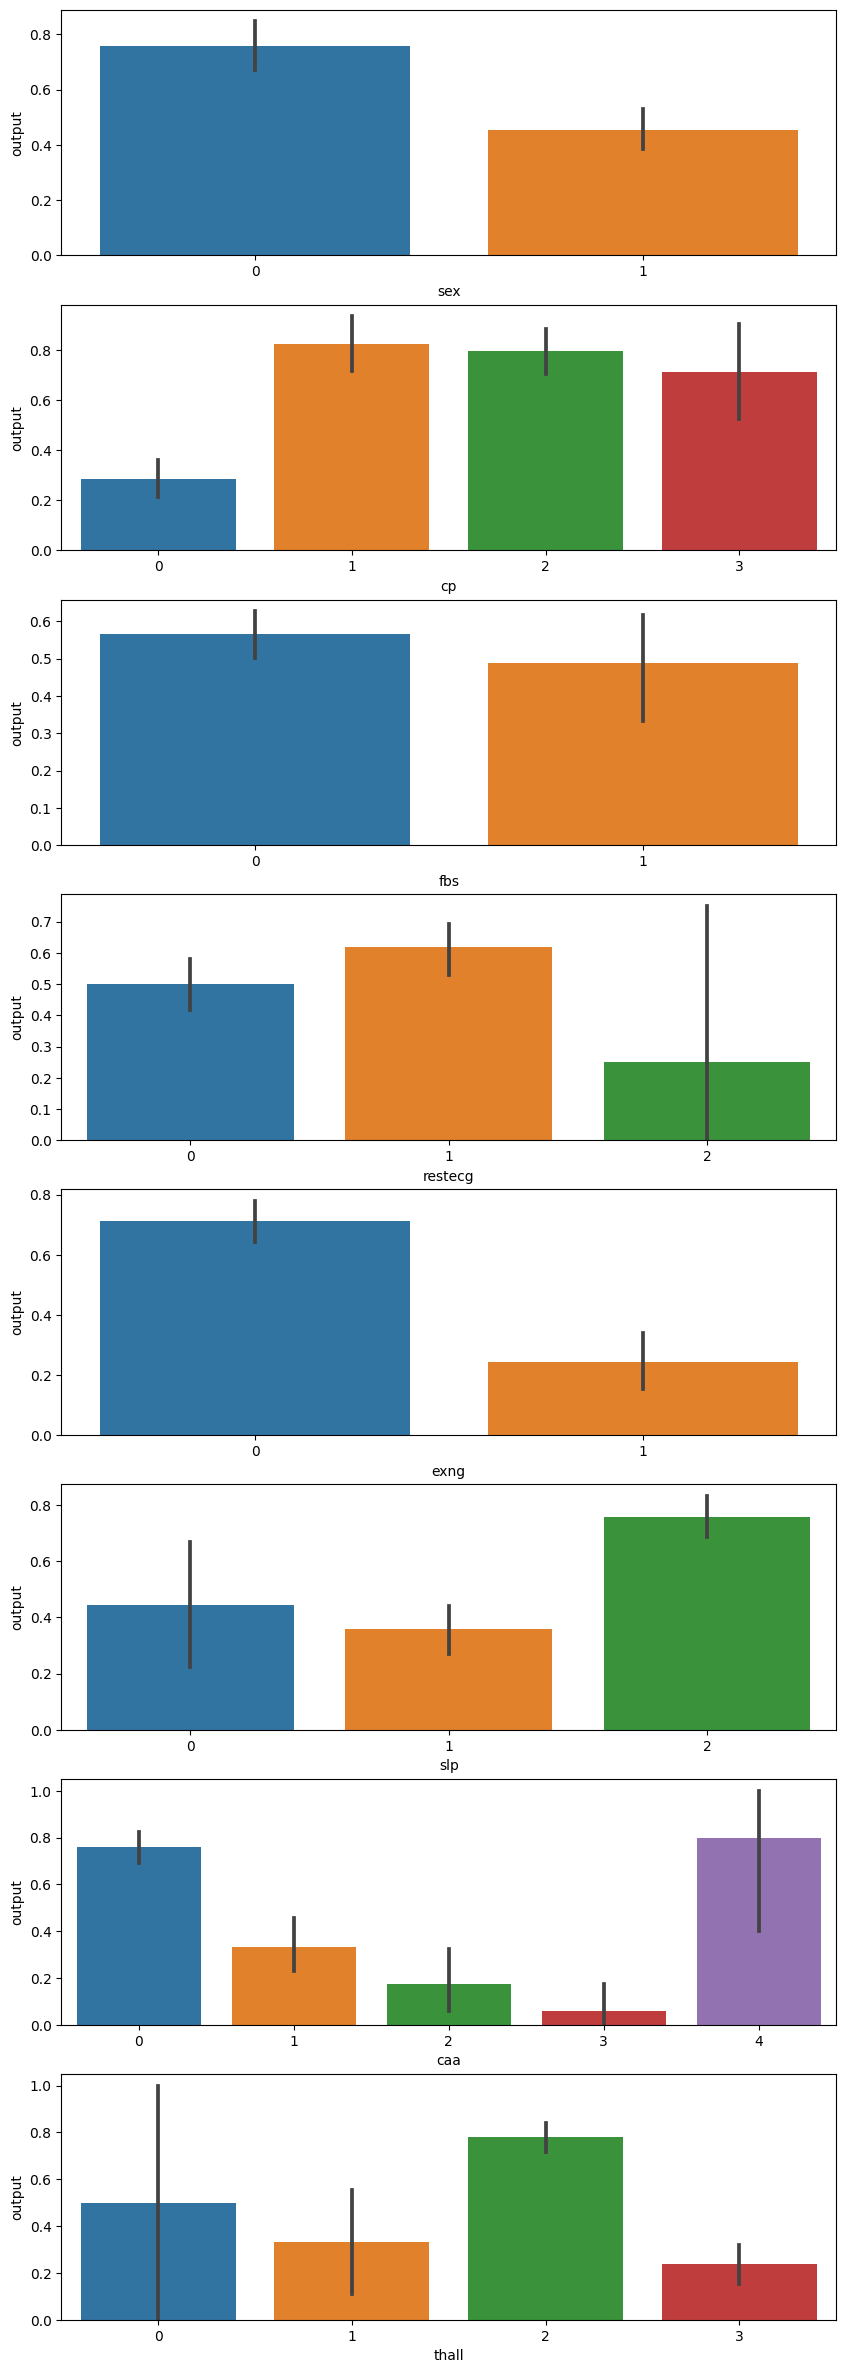

In [24]:
plot_count = len(low_cardinality_features)
fig, ax = plt.subplots(plot_count,1, figsize = (10,30))
count = 0
for plot in low_cardinality_features:
    sns.barplot(data = train_dataset, x = plot, y ='output', ax = ax[count], )
    count+=1

Based on the description of the variables the only variable of the low cardinality that can treated as numerical is Caa ( which is number of major vessels ). The other ones can be treated as categorical and are mostly nominal in nature.

# 5. Feature Engineering

In [25]:
train_dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [26]:
categorical_variables = ['sex','cp','fbs','restecg','exng','slp','thall']
numerical_categories = ['age','trtbps','chol','thalachh','']

# 6. Modelling

## 6.1 Preprocessing

### 6.1.1 Train Test Split

In [27]:
y_data = train_dataset.output
x_data = train_dataset.drop(columns = 'output')

x_training, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0) 

### 6.1.2 Pipeline Creation

In [28]:
numeric_pipeline = Pipeline([('scaler', StandardScaler())])
categorical = Pipeline([('one-hot-encoder', OneHotEncoder(handle_unknown = 'ignore'))])

col_transformer = ColumnTransformer(transformers = [("numeric_pipeline", numeric_pipeline , high_cardinality_features),
                                                    ("categorical_pipeline", categorical , categorical_variables)
                                                   ],
                                    remainder = 'passthrough', verbose_feature_names_out = False)

In [29]:
transformed_training_data = col_transformer.fit_transform(x_training)
new_column_names =  col_transformer.fit(x_training).get_feature_names_out(x_training.columns)
transformed_data_x_training = pd.DataFrame(transformed_training_data)
transformed_data_x_training.columns = new_column_names

## 6.2 Model Creation

In [65]:
random_forest_model = RandomForestClassifier(n_estimators = 1000)
xgb_boost_model = XGBClassifier(n_estimators = 1000)
logistic_regression = LogisticRegression(max_iter = 1500)

# Stacking Classifier
predictor_models = [('rf', RandomForestClassifier(n_estimators = 1000)),
              ('lr', LogisticRegression(max_iter = 1500)),
              ('xgb',XGBClassifier(n_estimators = 1000)),
             ]

stacking_classifier = StackingClassifier(estimators = predictor_models, final_estimator = LogisticRegression())

In [109]:
random_forest_model.fit(transformed_data_x_training,y_train)
xgb_boost_model.fit(transformed_data_x_training,y_train)
logistic_regression.fit(transformed_data_x_training,y_train)
stacking_classifier.fit(transformed_data_x_training,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=110,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       n_estimators=2000)),
                               ('lr',
                                LogisticRegression(C=0.17, max_iter=3582,
                                                   solver='newton-cg')),
                               ('xgb',
                                XGBClassifier(base_score=None,
                                              booster='gblinear',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=N...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=600, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [73]:
stacking_classifier.get_params()

{'cv': None,
 'estimators': [('rf', RandomForestClassifier(n_estimators=1000)),
  ('lr', LogisticRegression(max_iter=1500)),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=1000, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...))],
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_

In [67]:
# Checking for potential overfitting 
random_forest_model.score(transformed_data_x_training,y_train)

1.0

In [68]:
# Checking for potential overfitting 
xgb_boost_model.score(transformed_data_x_training,y_train)

1.0

In [69]:
# Checking for potential overfitting 
logistic_regression.score(transformed_data_x_training,y_train)

0.8842105263157894

In [70]:
# Checking for potential overfitting 
stacking_classifier.score(transformed_data_x_training,y_train)

0.9894736842105263

Text(0.5, 1.0, 'Feature Importance')

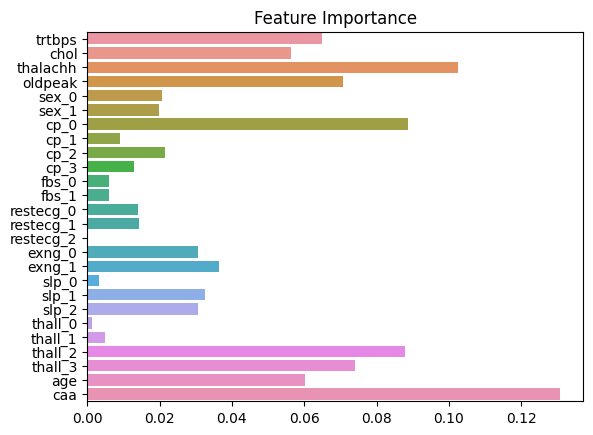

In [35]:
sns.barplot(y = random_forest_model.feature_names_in_, x = random_forest_model.feature_importances_, orient = 'h')
plt.title('Feature Importance')

## 6.3 Validation Dataset

In [36]:
transformed_validation_data = col_transformer.transform(x_validation)
transformed_data_x_validation = pd.DataFrame(transformed_validation_data)
transformed_data_x_validation.columns = new_column_names

In [37]:
# Checking for potential overfitting 
random_forest_model.score(transformed_data_x_validation,y_validation)

0.7804878048780488

In [38]:
# Checking for potential overfitting 
xgb_boost_model.score(transformed_data_x_validation,y_validation)

0.7682926829268293

In [111]:
# Checking for potential overfitting 
logistic_regression.score(transformed_data_x_validation,y_validation)

0.8170731707317073

In [112]:
# Checking for potential overfitting 
stacking_classifier.score(transformed_data_x_validation,y_validation)

0.8170731707317073

### 6.3.1 Hyperparameter Tuning

In [81]:
lr__max_iter = range(1000, 4000)
lr__solver = ['lbfgs', 'newton-cg', 'liblinear']
lr__C = np.arange(0, 1, 0.01)
rf__n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
rf__max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
rf__min_samples_split = [2, 5, 10]
rf__min_samples_leaf = [1, 2, 4]
rf__bootstrap = [True, False]
xgb__booster = ['gbtree','gblinear']
xgb__learning_rate = [0.1]
xgb__max_depth =  [7,10,15,20]
xgb__min_child_weight = [10,15,20,25]
xgb__colsample_bytree = [0.8, 0.9, 1]
xgb__n_estimators = [300,400,500,600]

random_grid ={
    'lr__max_iter' : lr__max_iter,
    'lr__solver' : lr__solver,
    'lr__C' : lr__C,
    'rf__n_estimators': rf__n_estimators,
    'rf__max_depth': rf__max_depth,
    'rf__min_samples_split': rf__min_samples_split,
    'rf__min_samples_leaf': rf__min_samples_leaf,
    'rf__bootstrap': rf__bootstrap,
    'xgb__booster':xgb__booster,
    'xgb__learning_rate' : xgb__learning_rate,
    'xgb__n_estimators' : xgb__n_estimators
} 

stacked_classifier_cv = RandomizedSearchCV(estimator = stacking_classifier, param_distributions = random_grid, n_iter = 3 ,cv = 3, random_state=0)
stacked_classifier_tuned = stacked_classifier_cv.fit(transformed_data_x_validation,y_validation)

print('Stacked Classifier RandomizedSearch Done')

Stacked Classifier RandomizedSearch Done


In [83]:
best_params = stacked_classifier_tuned.best_params_
stacking_classifier = StackingClassifier(estimators = predictor_models, final_estimator = LogisticRegression())
stacking_classifier.set_params(**best_params)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=110,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       n_estimators=2000)),
                               ('lr',
                                LogisticRegression(C=0.17, max_iter=3582,
                                                   solver='newton-cg')),
                               ('xgb',
                                XGBClassifier(base_score=None,
                                              booster='gblinear',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=N...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=600, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [84]:
stacked_classifier_tuned.best_params_
stacking_classifier_final = StackingClassifier(estimators = predictor_models, final_estimator = LogisticRegression())
stacking_classifier_final.fit(transformed_data_x_validation,y_validation)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=110,
                                                       min_samples_leaf=4,
                                                       min_samples_split=5,
                                                       n_estimators=2000)),
                               ('lr',
                                LogisticRegression(C=0.17, max_iter=3582,
                                                   solver='newton-cg')),
                               ('xgb',
                                XGBClassifier(base_score=None,
                                              booster='gblinear',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=N...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=600, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [85]:
stacking_final_prob = stacking_classifier_final.predict_proba(transformed_data_x_validation)[:,1]


In [86]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_validation.values,stacking_final_prob)

<AxesSubplot: title={'center': 'Precision-Recall Curve'}>

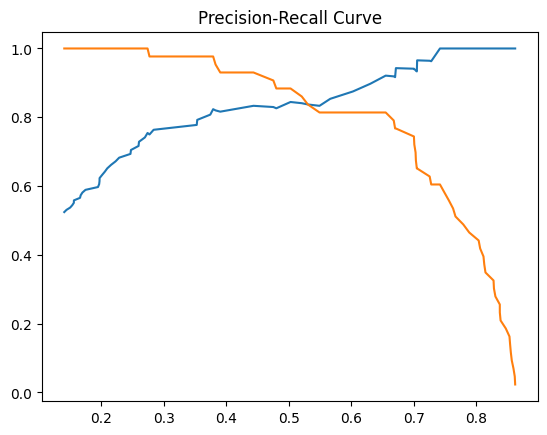

In [87]:
plt.title('Precision-Recall Curve')
sns.lineplot(x=threshold_rf,y=precision_rf[:-1], legend = 'brief')
sns.lineplot(x=threshold_rf,y=recall_rf[:-1])

Text(0.5, 1.0, 'ROC Curve')

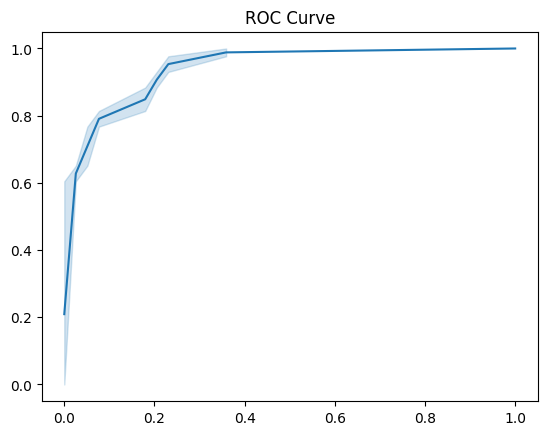

In [88]:
# Creating a ROC Curve
#random_forest_predicted = cross_val_predict(estimator = random_forest_model, X = transformed_data_x_validation, y = y_validation, cv = 10, method = 'predict_proba')[:,1]
fpr, tpr, threshold  = roc_curve(y_validation,stacking_final_prob)
sns.lineplot(x = fpr, y = tpr)
plt.title('ROC Curve')

In [90]:
acc_array = list()
for threshold in range(0,100,1):
    predicted_int = np.where(stacking_final_prob > threshold/100, 1 , 0 )
    acc_array.append(accuracy_score(y_validation,predicted_int))

Text(0.5, 1.0, 'Accuracy')

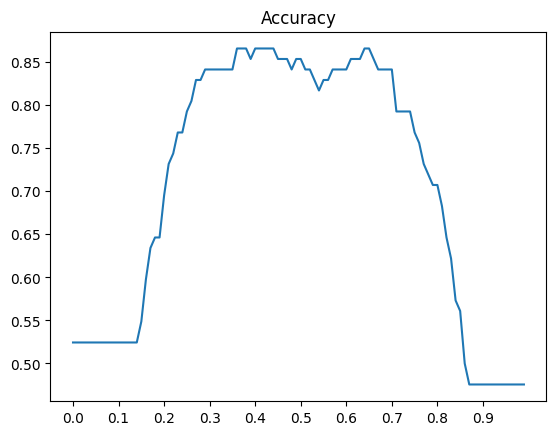

In [91]:
sns.lineplot(data = acc_array)
plt.xticks(list(range(0,100,10)),np.array(list(range(0,100,10)))/100)
plt.title('Accuracy')

In [92]:
# Area under the curve
auc(x = fpr, y = tpr)

0.9481216457960644

# 7. Test Dataset

In [97]:
x_test = test_dataset.drop(columns = 'output')
y_test = test_dataset.output

In [98]:
transformed_test_data = col_transformer.transform(x_test)
transformed_test_data = pd.DataFrame(transformed_test_data)
transformed_test_data.columns = new_column_names

In [101]:
stacking_final_predicted_test = stacking_classifier_final.predict_proba(transformed_test_data)[:,1]

In [102]:
fpr, tpr, _ = roc_curve(y_test,stacking_final_predicted_test)

In [103]:
# Area Under the Curve. 
auc(fpr,tpr)

0.907563025210084

In [106]:
test_dataset = test_dataset.copy()
test_dataset['predicted'] = stacking_final_predicted_test

In [107]:
test_dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predicted
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.163543
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1,0.549630
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,0.601225
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.150902
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0.332406
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0,0.512789
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,0.236305
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0,0.261122
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,0.154589
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0,0.155606


In [9]:
sys.path.append('/Users/michael/Desktop/Projects/Kaggle/machine-learning-env/Classification/Heart Attack Prediction/heart-attack-pred-env/lib/python3.10/site-packages')
                
                